In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import matplotlib
#Customize background and pallete colors 
sns.set_style("darkgrid")
#ncol = len(phy_norm.T.columns)
from matplotlib import cm
ncol=21
values = np.linspace(0,1, ncol)
#colors_ = cm.Paired(values)
colors_=cm.tab20(values)

# 1. Read data 

In [2]:
pfams=pd.read_table("../2_Profiles_data/metabolic_profile/mats_abundances.sort.tab", index_col=0)
pfams_norm=pfams/pfams.sum()

# 2.  Select the pfam domains to plot 

In [4]:
markers=pfams.T[[   #Oxygen
                    'PF00067', 'PF00115', 'PF01077', 'PF02560', 'PF03460', 'PF04898', 'PF13442',
                      #Mycosporine Biosynthesis UV Protection 
                    #'PF00501',
                  'PF13193','PF00550','PF00975','PF02655','PF01596','PF01761',
                    #Nitrogen 
                    'PF00174', 'PF00507', 'PF00547', 'PF00699', 
                    'PF02211','PF02633', 'PF05899', 'PF09347',
                    #Iron 
                    'PF14522', 'PF00033', 'PF00034','PF00355',
                    #Sulfur                 
                   'PF12139', 'PF00374','PF01747','PF02662','PF10418','PF13247','PF04358',
                    'PF01058','PF01568','PF09242','PF04879','PF08770',
                    #Sulfur high std     
                    'PF14306','PF03916','PF17179','PF13501','PF02665','PF14697',
                    #Methane
                    'PF01913', 'PF01993','PF02289','PF02741','PF04208' ,'PF04211','PF05440']]
#Sort columns 
markers=markers.T
markers=markers[['S1','S4','S7','S10',
                 'S2','S5','S8','S11',
                'S3','S6','S9','S12']]
#Drop ceros
markers = markers[(markers.T!= 0).any()]
#Normalize data
markers=markers/markers.sum()
markers.head()

,S1,S4,S7,S10,S2,S5,S8,S11,S3,S6,S9,S12
PFAM,,,,,,,,,,,,
PF00067,0.030623,0.059136,0.044039,0.034653,0.010279,0.026952,0.012026,0.008030,0.018784,0.013968,0.029771,0.013086
PF00115,0.078669,0.075071,0.071754,0.082358,0.054332,0.078067,0.060879,0.046764,0.065250,0.050181,0.066794,0.054162
PF01077,0.022703,0.026558,0.027335,0.024302,0.019090,0.024164,0.025930,0.020312,0.019278,0.025867,0.029389,0.029080
PF02560,0.001056,0.001062,0.001139,0.000900,0.000000,0.002788,0.000376,0.000000,0.000989,0.001035,0.001145,0.000364
PF03460,0.015312,0.021246,0.015566,0.018002,0.016153,0.016264,0.013529,0.012282,0.017795,0.014485,0.017557,0.016721


In [48]:
uv=pfams_norm.T[['PF00501',
                  'PF13193','PF00550','PF00975','PF02655','PF01596','PF01761']]
uv=uv.T
uv=uv[['S1','S4','S7','S10',
                 'S2','S5','S8','S11',
                'S3','S6','S9','S12']]
#Drop ceros
#markers = markers[(markers.T!= 0).any()]
#Normalize data


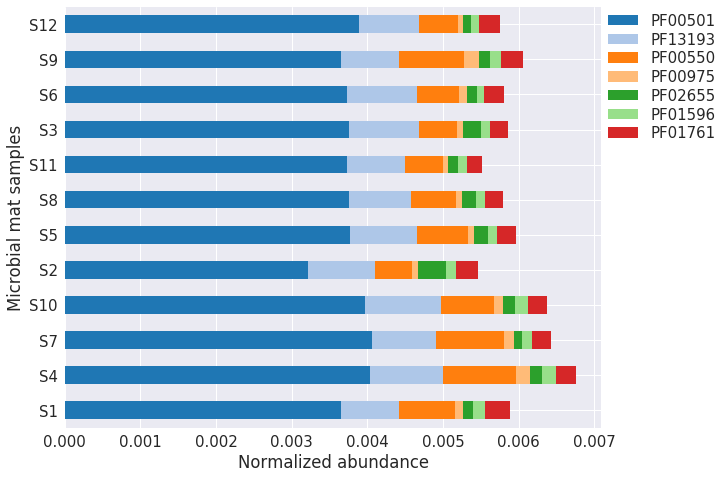

In [61]:
sns.set(font_scale=1.5)

uv.T.plot(kind='barh',stacked=True,color=colors_,figsize=(9,7))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.25)
plt.xlabel("Normalized abundance")
plt.ylabel("Microbial mat samples")
plt.tight_layout()
plt.savefig("micosporinas.png", bbox_inches='tight',dpi=500) 


# 3. Plot heatmap 

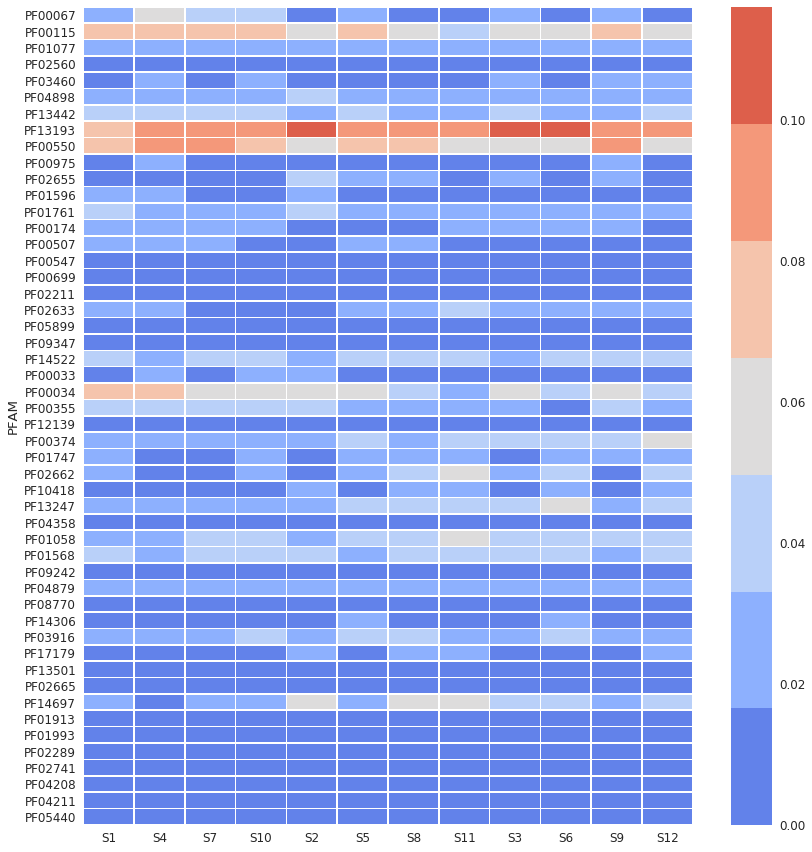

In [8]:
sns.set(font_scale=1.2)
fig = plt.figure(figsize=(12,12))
ax= sns.heatmap(markers, linewidths=0.6,cmap=sns.color_palette("coolwarm", 7))
sns.set(font_scale=1)
#sand = plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
#plt.ylabel("Sulfur Metabolic pathways", weight="bold")
plt.savefig("Heatmap.cycles.uv.png",bbox_inches='tight', dpi=600)

# 4. Read Scores 

Directory containing the scores 

```
/home/valdeanda/tapetes_cycles/05_ORF
```
Comand to get the scores

```
grep "Pfam entropy score" *tab*score | sed 's/metahit.final.contigs.fa.prodigal.faa.out.hmmsearch.tab./\t/g' | sed 's/.score:# Pfam entropy score:/\t/g' | sed 's/_//g'  > scores.mats.tsv 
```
Parse the files  

```

```

In [2]:
scores=pd.read_table("scores.mats.tsv",index_col=0)
ids=pd.read_table("samples_id.tab",index_col=0)
ids.head()

,Time,Site
Sample,,
S1,Autumn 12,A
S2,Autumn 12,B
S3,Autumn 12,C
S4,Spring 13,A
S5,Spring 13,B


In [3]:
#sorted_scores=pd.pivot_table(scores,columns="Cycle", index="Sample")
#sorted_scores.to_csv("sorted.scores.tab",sep="\t")


In [4]:
sorted_scores=pd.read_table("sorted.scores.tab",index_col=0)
sorted_scores.head()

,iron,methane,nitrogen,oxygen,sulfur
Cycle,,,,,
S1,1.396,2.764,6.511,0.558,8.505
S10,1.396,2.764,6.511,0.558,8.763
S11,1.396,2.764,6.511,0.558,8.763
S12,1.396,2.764,6.511,0.558,8.901
S2,1.371,2.842,6.384,0.770,8.831


In [6]:
concat=pd.concat([ids,sorted_scores],axis=1)
#MTScycles=pd.concat([ironmax, sulfurmax,methanemax,oxygenmax,nitrogenmax], axis=1)

In [7]:
concat.columns #para checar si hay espacios en blanco que no vemos

Index(['Time', 'Site', 'iron', 'methane', 'nitrogen', 'oxygen', 'sulfur'], dtype='object')

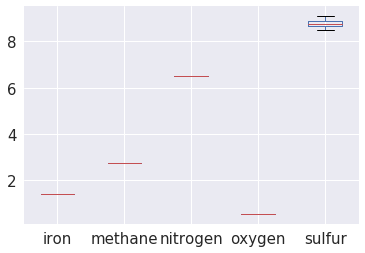

In [14]:
concat.boxplot()

In [9]:
#scores=pd.read_table("scores_mats.tab")
#scores.head()

# 5.Plot Scores

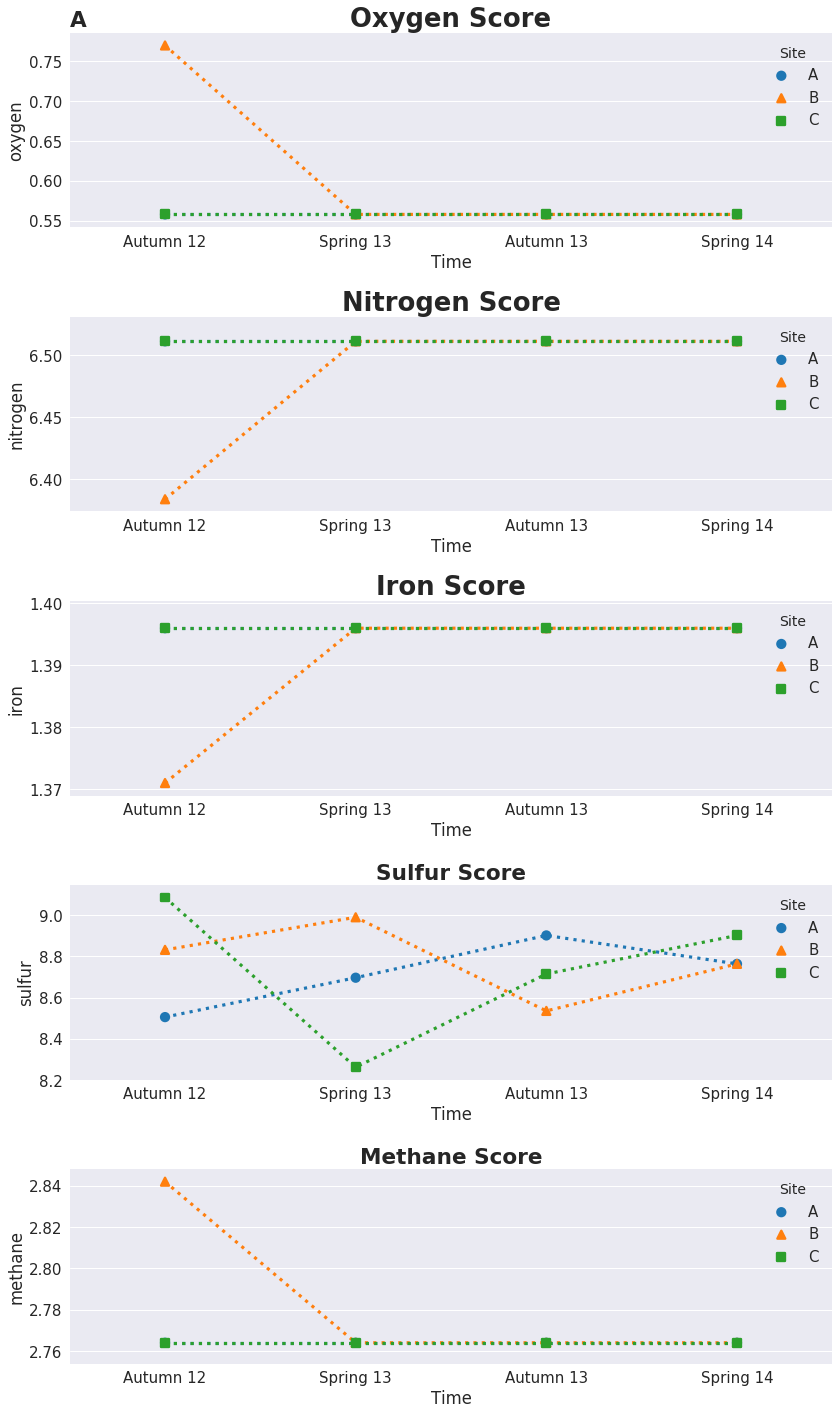

In [16]:
sns.set(font_scale=1.5)
X = 12
Y = 20

fig = plt.figure(figsize=(X, Y))

plt.subplot(511)
ax=sns.pointplot(x="Time", y="oxygen", hue="Site", data=concat, 
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], linestyles=[":", ":",":"], palette="tab10")
#ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.title("A",loc='left',weight='bold',size='large')
plt.title("Oxygen Score",weight='bold',size='x-large')
plt.tight_layout()

plt.subplot(512)
ax=sns.pointplot(x="Time", y="nitrogen", hue="Site", data=concat,
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], linestyles=[":", ":",":"],palette="tab10")
#ax.xaxis.set_major_formatter(plt.NullFormatter())
#plt.title("B",loc='left',weight='bold',size='large')
plt.title("Nitrogen Score",weight='bold',size='x-large')

plt.tight_layout()

plt.subplot(513)
ax=sns.pointplot(x="Time", y="iron", hue="Site", data=concat,
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], linestyles=[":", ":",":"],palette="tab10")
#ax.xaxis.set_major_formatter(plt.NullFormatter())
#plt.title("C",loc='left',weight='bold',size='large')
plt.title("Iron Score",weight='bold',size='x-large')
plt.tight_layout()


plt.subplot(514)
ax=sns.pointplot(x="Time", y="sulfur", hue="Site", data=concat, 
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], linestyles=[":", ":",":"],palette="tab10"),
#ax.xaxis.set_major_formatter(plt.NullFormatter())
#plt.title("D",loc='left',weight='bold',size='large')
plt.title("Sulfur Score",weight='bold',size='large')
plt.tight_layout()


plt.subplot(515)
ax=sns.pointplot(x="Time", y="methane", hue="Site", data=concat,
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], linestyles=[":", ":",":"],palette="tab10",)

#plt.title("E",loc='left',weight='bold',size='large')
plt.title("Methane Score",weight='bold',size='large')
plt.tight_layout()

plt.savefig("MEBS_score.allcycles.repeated.300dpi.png",bbox_inches='tight',dpi=300)

### Old data, just in case 
(no borrar hasta confirmar todo)

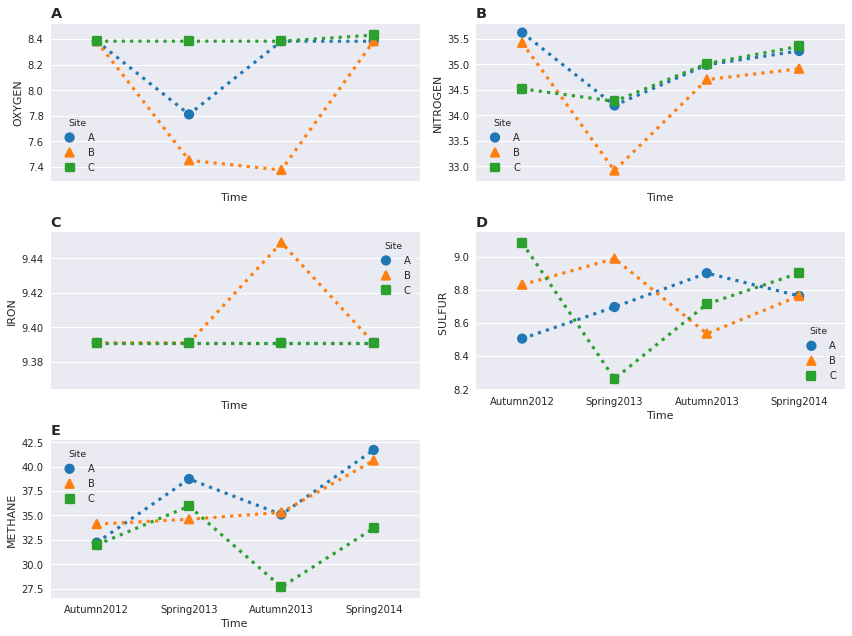

In [252]:
from numpy import median
X = 12
Y = 9

fig = plt.figure(figsize=(X, Y))
#Anerobic cycles 

plt.subplot(321)
ax=sns.pointplot(x="Time", y="OXYGEN", hue="Site", data=scores,
            markers=["o","^","s"], linestyles=[":", ":",":"], palette="tab10")
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.title("A",loc='left',weight='bold',size='large')
plt.tight_layout()

plt.subplot(322)
ax=sns.pointplot(x="Time", y="NITROGEN", hue="Site", data=scores,
            markers=["o","^","s"], linestyles=[":", ":",":"],palette="tab10")
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.title("B",loc='left',weight='bold',size='large')
plt.tight_layout()

plt.subplot(323)
ax=sns.pointplot(x="Time", y="IRON", hue="Site", data=scores,
            markers=["o","^","s"], linestyles=[":", ":",":"],palette="tab10")
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.title("C",loc='left',weight='bold',size='large')
plt.tight_layout()


plt.subplot(324)
ax=sns.pointplot(x="Time", y="SULFUR ", hue="Site", data=scores,
            markers=["o","^","s"], linestyles=[":", ":",":"],palette="tab10")
plt.title("D",loc='left',weight='bold',size='large')
plt.tight_layout()


plt.subplot(325)
ax=sns.pointplot(x="Time", y="METHANE", hue="Site", data=scores,
            markers=["o","^","s"], linestyles=[":", ":",":"],palette="tab10")
plt.title("E",loc='left',weight='bold',size='large')
plt.tight_layout()
plt.savefig("MEBS_score.allcycles.png",bbox_inches='tight',dpi=500)

# 6.Plot completeness 


In [ ]:
#comp=pd.read_table("sulfur.mats.parsed.tsv", index_col=0) 
#comp=comp.T
#comp=comp.drop(['28','27','26','25','24','12','8'])
#agregamos a mano los nombres anuqe se puede hacer una lista con los nombres y luego concat pero ya tengo
#hueva y ya me casne

In [55]:
comp=pd.read_table("completeness.parse.tab",index_col=0)
comp=comp.T


# 7.Parse or sort dataframe 

In [56]:
sorted_columns = ["s01_ANOV12", "s04_AMAY13", "s07_AOCT13", "s10_AMAY14",
                 "s02_BNOV12", "s05_BMAY13", "s08_BOCT13", "s11_BMAY14",
                 "s03_CNOV12", "s06_CMAY13", "s09_COCT13", "s12_CMAY14"]

# 8. Plot completeness (heatmap) 

/usr/local/lib/python3.5/dist-packages/matplotlib-2.0.2+4432.g411fbf6-py3.5-linux-x86_64.egg/matplotlib/figure.py:1988: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


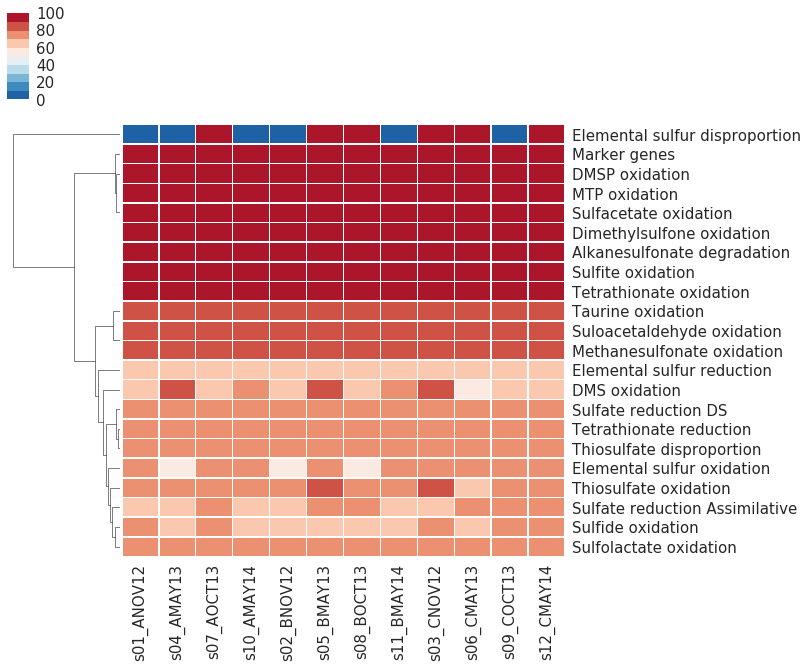

In [59]:
sns.set(font_scale=1.5)
axs = sns.clustermap(comp[sorted_columns], col_cluster=False, linewidths=0.6,cmap=sns.color_palette("RdBu_r", 10))
plt.tight_layout()
plt.savefig("Completeness.png", bbox_inches='tight', dpi=600)